# Wine Dataset Clustering: K-Means vs Hierarchical

# Group 3
# Data Mining & Business Intelligence


In [ ]:
# =============================
# Part A: Data Loading & Preprocessing
# =============================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define column names
COLUMN_NAMES = [
    'label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280_od315', 'proline'
]

#  Load dataset
DATA_PATH = 'wine.data'
df = pd.read_csv(DATA_PATH, header=None, names=COLUMN_NAMES)

print('First 10 rows:')
display(df.head(10))

# Check numeric types and missing values
print('\nData types:')
print(df.dtypes)
print('\nMissing values per column:')
print(df.isnull().sum())

# Standardize features (Z-score)
X = df.drop(columns=['label'])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Save scaled dataset locally
X_scaled.to_csv('wine_scaled.csv', index=False)
print('\nScaled dataset saved as wine_scaled.csv')

First 10 rows:


,label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045



Data types:
label                     int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_of_ash       float64
magnesium                 int64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
od280_od315             float64
proline                   int64
dtype: object

Missing values per column:
label                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280_od315             0
proline                 0
dtype: int64

Scaled dataset saved as wine_scaled.csv


Descriptive statistics for selected features:


,alcohol,malic_acid,ash,flavanoids
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-1.695971e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-8.275393e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.061497e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,8.490851e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.062832e+00


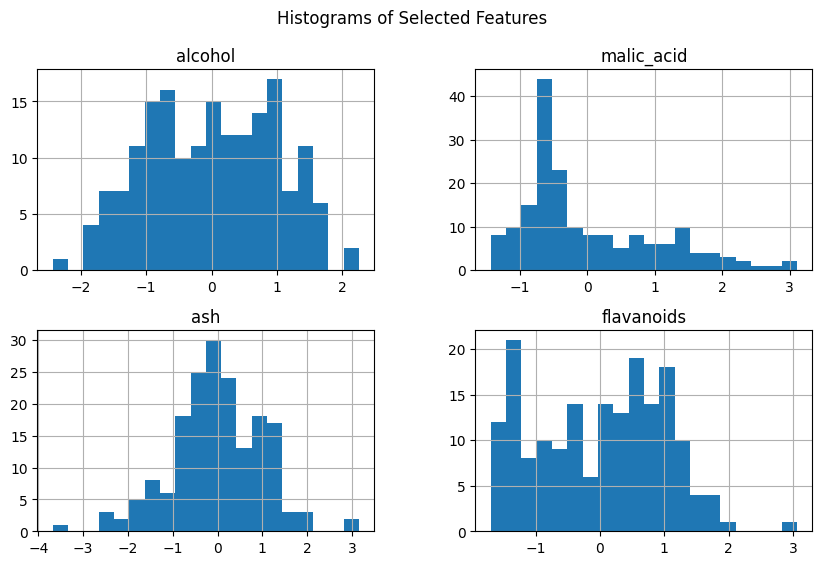

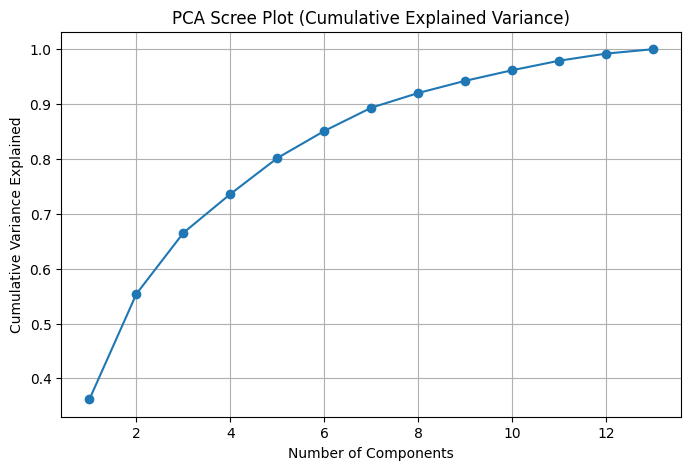

In [ ]:
# =============================
# Part B: First Exploratory Data Analysis
# =============================
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Descriptive statistics
print('Descriptive statistics for selected features:')
display(X_scaled[['alcohol', 'malic_acid', 'ash', 'flavanoids']].describe())

# Plot histograms
features_to_plot = ['alcohol', 'malic_acid', 'ash', 'flavanoids']
X_scaled[features_to_plot].hist(bins=20, figsize=(10,6))
plt.suptitle('Histograms of Selected Features')
plt.show()

# PCA Scree plot
pca = PCA()
pca.fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title('PCA Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [ ]:
# =============================
# Part C: Feature Engineering
# =============================
# Example composite feature
X_scaled['acid_index'] = X_scaled['malic_acid'] / (X_scaled['alcohol'] + 1e-6)
print('Added feature: acid_index = malic_acid / alcohol')

# PCA transformation for dimensionality reduction
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)
print('PCA reduced shape:', X_pca.shape)

Added feature: acid_index = malic_acid / alcohol
PCA reduced shape: (178, 2)


,k,Silhouette,DB,CH
0,2,0.572803,0.783496,39.709016
1,3,0.609726,0.652892,136.213868
2,4,0.208409,1.083940,115.934842
3,5,0.233235,0.986177,121.109311
4,6,0.259937,1.031688,116.750281
5,7,0.267223,0.901966,130.261870
6,8,0.290936,0.893646,132.654221



Ward linkage cophenetic correlation: 0.7734


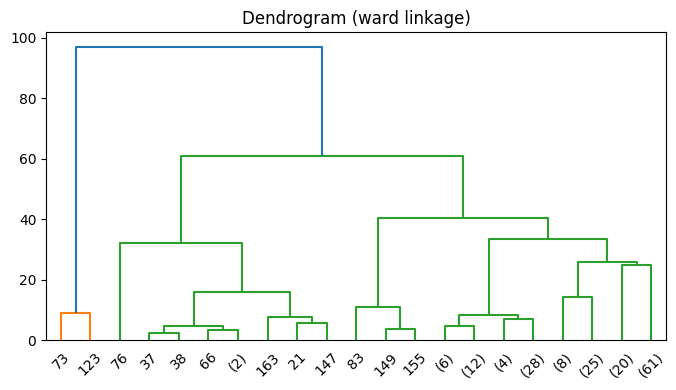


Average linkage cophenetic correlation: 0.9684


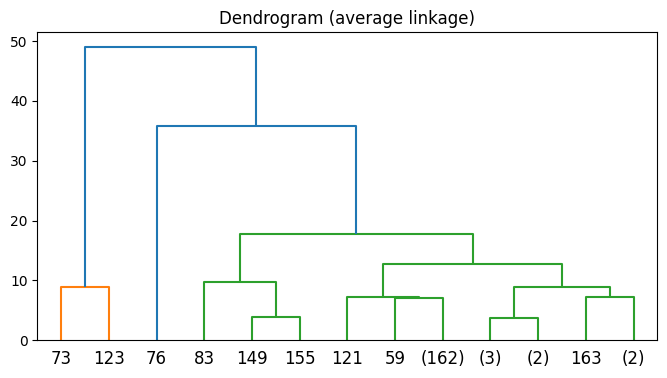

In [ ]:
# =============================
# Part D: Clustering Modelling & Validation
# =============================
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

scores = []
for k in range(2,9):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    scores.append((k, sil, db, ch))

score_df = pd.DataFrame(scores, columns=['k', 'Silhouette', 'DB', 'CH'])
display(score_df)

# Hierarchical clustering (Ward & average)
for method in ['ward', 'average']:
    linked = linkage(X_scaled, method=method)
    coph_corr, _ = cophenet(linked, pdist(X_scaled))
    print(f'\n{method.capitalize()} linkage cophenetic correlation: {coph_corr:.4f}')
    plt.figure(figsize=(8,4))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.show()

Cluster centroids (original scale):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,13.013333,2.268889,2.186667,16.944444,94.777778,2.333333,2.256667,0.293333,1.696667,5.280000,0.984444,2.694444,791.555556
1,13.030000,3.776667,2.350000,24.666667,103.333333,2.523333,2.376667,0.373333,1.863333,3.583333,0.960000,2.870000,626.666667
2,12.999398,2.313976,2.376566,19.539759,99.945783,2.288916,2.010663,0.365361,1.580241,5.072711,0.955940,2.602530,746.644578


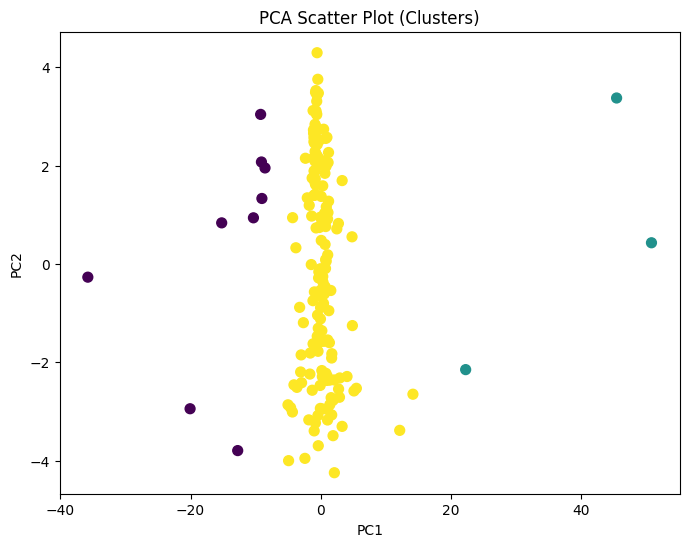

ANOVA alcohol p-value: 0.9967855718952371
ANOVA flavanoids p-value: 0.6443207452315309


In [ ]:
# =============================
# Part E: Second EDA & Statistical Inference
# =============================
from scipy.stats import f_oneway, kruskal

# Use best k from KMeans (assume 3 for demonstration)
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)
df['cluster'] = clusters

# Cluster centroids
original_features = X.columns  # first 13 features
centroids_scaled = pd.DataFrame(kmeans_final.cluster_centers_, columns=X_scaled.columns)

# Select only original features for inverse transform
centroids_original = scaler.inverse_transform(centroids_scaled[original_features])
centroids = pd.DataFrame(centroids_original, columns=original_features)

print("Cluster centroids (original scale):")
display(centroids)

# PCA scatter plot colored by cluster
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title('PCA Scatter Plot (Clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ANOVA/Kruskal-Wallis for alcohol and flavanoids
f1 = f_oneway(*[df[df.cluster==i]['alcohol'] for i in range(k_opt)])
f2 = f_oneway(*[df[df.cluster==i]['flavanoids'] for i in range(k_opt)])

print('ANOVA alcohol p-value:', f1.pvalue)
print('ANOVA flavanoids p-value:', f2.pvalue)

# =============================
# Part F: Presentation & Reflection
# =============================
- PCA reduced 13 features to 2 for visualization, preserving most variance.
- K-means produced compact spherical clusters (faster, better for large datasets).
- Hierarchical clustering revealed hierarchical structure but is computationally heavier.
- Trade-off: interpretability vs scalability.
- Dendrograms show potential cluster merges; K-means is better for this dataset’s geometry.